# PIC Lab Instruments (PLI)
## Example Usage

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

### Import the Setup Definition
The Setup Definition (`setup`) is an object that contains a member for each physical instrument on that setup.
These members can be called to create an instance of them / to use them.

Each lab setup / optical table / computer has its own Setup Definition. These are all defined in `index.py`.

In [3]:
# When in the lab, the right setup is automatically loaded:
from PIC_Lab_instruments import setup

In [4]:
# For this demo, we load a dummy setup definition
from PIC_Lab_instruments import get_index
setup2 = get_index("SETUP_2", dummy=True)
setup1 = get_index("SETUP_1", dummy=True)

### Create (dummy) instrument objects
Calling the attributes of the setup creates instrument objects that can be used to perform physical actions.

Because we're using a dummy setup, here we get the dummy versions instead.

In [5]:
klt = setup2.Keithley_2520()
pm  = setup1.Keysight_N7786B()

Keithley_252X is in dummy mode. Printing all requests to console.
Keithley_252X.device.write('*RST') --> returning '0'
Keysight_N7786B is in dummy mode. Printing all requests to console.


An instantiated instrument can be used for your every day Sourcemeter and Power Meter tasks...

In [6]:
klt.setup(channel="laser", mode="i")
klt.measure("laser", "voltage")
#pm.measure("optical power")

Keithley_252X.device.query(':READ?') --> returning '0.37,0.09,0.71'


0.37

... Or Temperature Controller shenanigans: 

In [7]:
tec = setup2.Thorlabs_TED_8040()
tec.setup(target=25)
tec.measure("temp")

Thorlabs_TED_8040 is in dummy mode. Printing all requests to console.
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.write(':TEMP:SET 25') --> returning '0'
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.query(':TEMP:ACT?') --> returning 'ACT 24.86'


24.86

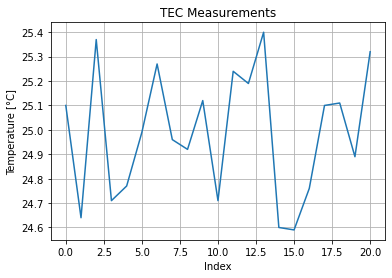

In [8]:
fig, ax = plt.subplots()
ax.set_title("TEC Measurements")
ax.set_ylabel("Temperature [°C]")
ax.set_xlabel("Index")
ax.grid(True)

tec.device.silent = True #don't print the same thing 21 times
ax.plot([tec.measure("temp") for _ in range(21)])
tec.device.silent = False

## Contributing
New instrument classes may be created when equipment gets added to the labs. These classes inherit from the appropriate prototype.

In [9]:
# You would write this code in new file located in the appropriate subdirectory.
# Here, that would be: PIC_Lab_instruments/instruments/laser/SomBrand_NewLaser.py

class_code = """\
# Import the prototype
from PIC_Lab_instruments.instruments.laser.laser import laser

# Create new class, inherit from prototype
class SomeBrand_NewLaser(laser):
    num_channels = 1
    
    # Initialiser, e.g. sets the initial state
    def __init__(self, resource):
        super().__init__(resource)
        self.state = {'is_on': None, 'mode': "optical power"}
    
    # Below are callback methods
    # These are not accessed directly, but via a higher-level interface
    def _set_optical_power_level(self, P):
        self.device.write(f"Sending command to set power level {P}")
    
    def _enable_output(self):
        self.device.write("Sending command to enable laser output")
    
    def _disable_output(self):
        self.device.write("Sending command to disable laser output")
"""

with open("sourcefile.py", "w") as f:
    f.write(class_code)

In [10]:
from sourcefile import SomeBrand_NewLaser
las = SomeBrand_NewLaser("dummy")

SomeBrand_NewLaser is in dummy mode. Printing all requests to console.


In [11]:
las.output(True)
las.setlevel(10)

SomeBrand_NewLaser.device.write('Sending command to enable laser output') --> returning '0'
SomeBrand_NewLaser.device.write('Sending command to set power level 10') --> returning '0'


# Uniform Measurement Framework (UMF)
## Harness the uniformity of PLI to standardise measurement procedures

Gitlab home page: https://gitlab.hhi.fraunhofer.de/pc-fou-lab/tools


Clone repository to computer:

`git clone https://gitlab.hhi.fraunhofer.de/pc-fou-lab/tools.git` 

Make sure that the directory `tools` that was just created is discoverable by Python.



In [12]:
# Add the local git repo location to the path
import sys
sys.path.append("../tools")

## Perform single DBR Grating transmision measurement

In [13]:
from umf.measurements import DBR_Grating

In [14]:
dbr = DBR_Grating(klt, las, pm, dut_channel="laser", wavelengths=np.linspace(1540e-9, 1560e-9, 11))

C:\Users\Administrator\Documents\WPy64-31040\notebooks\../tools\umf\main.py:47: UserWarning: UMF was unable to find Instrument Index for this machine.
  warnings.warn("UMF was unable to find Instrument Index for this machine.")


Keithley_252X.device.write('OUTP1 ON') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR 0.0') --> returning '0'
Keysight_N7786B.device.SCPIQuery(':POL:SOP?') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR -0.1') --> returning '0'
Keysight_N7786B.device.SCPIQuery(':POL:SOP?') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR -0.2') --> returning '0'
Keysight_N7786B.device.SCPIQuery(':POL:SOP?') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR -0.30000000000000004') --> returning '0'
Keysight_N7786B.device.SCPIQuery(':POL:SOP?') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR -0.4') --> returning '0'
Keysight_N7786B.device.SCPIQuery(':POL:SOP?') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR -0.5') --> returning '0'
Keysight_N7786B.device.SCPIQuery(':POL:SOP?') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR -0.6000000000000001') --> returning '0'
Keysight_N7786B.device.SCPIQuery(':POL:SOP?') --> returning '0'
Keithley_252X.dev

C:\Users\Administrator\Documents\WPy64-31040\python-3.10.4.amd64\lib\site-packages\PIC_Lab_instruments\device.py:226: UserWarning: Key wavelength not understood by SomeBrand_NewLaser.
  warnings.warn(f"Key {key} not understood by {self.__class__.__name__}.")


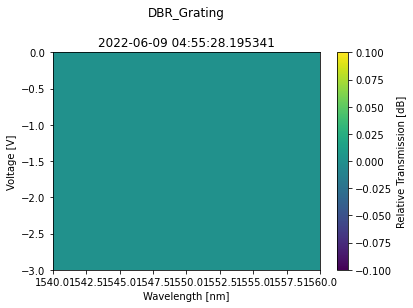

In [15]:
res1 = dbr()

In [16]:
res1

UMF Measurement Result for UMF type DBR_Grating (foubase type 'to be created in foubase').
	Created: 2022-06-09 04:55:28.195341

## Sweep TEC temperature and take VI curves

In [17]:
from umf.measurements import LIV

In [18]:
liv = LIV(klt, tec, dut_channel="laser", pd_channel="detector 1", currents=np.linspace(0, 120e-3, 11))

Keithley_252X.device.write('SOUR2:VOLT -2') --> returning '0'


Keithley_252X.device.write('OUTP1 ON') --> returning '0'
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.write(':TEMP:SET 20') --> returning '0'
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.query(':TEMP:SET?') --> returning 'SET 20'
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.query(':TEMP:ACT?') --> returning 'ACT 20.28'
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.query(':TEMP:ACT?') --> returning 'ACT 20.48'
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.query(':TEMP:ACT?') --> returning 'ACT 20.24'
Thorlabs_TED_8040.device.write(':SLOT None') --> returning '0'
Thorlabs_TED_8040.device.query(':TEMP:ACT?') --> returning 'ACT 20.03'
Keithley_252X.device.write('SOUR1:FUNC DC') --> returning '0'
Keithley_252X.device.write('SOUR1:CURR 0.0') --> returning '0'
Keithley_252X.device.qu

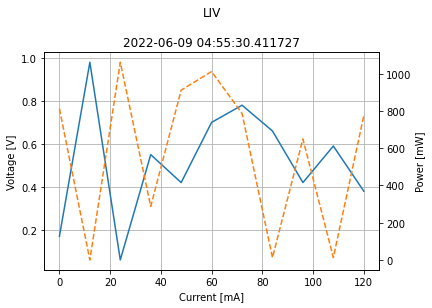

In [19]:
r = liv()

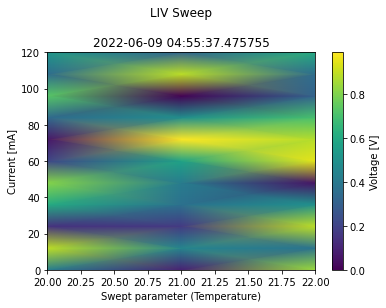

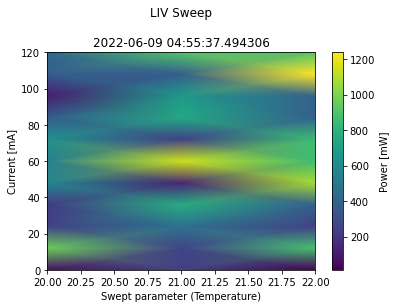

In [20]:
klt.device.silent = True
tec.device.silent = True
voltages, powers = liv.sweep(temperature = (20, 21, 22))

In [21]:
voltages

UMF Sweep Result for UMF type LIV (foubase type 'vi') (3 results).
Swept parameters:
	temperature on 'tec' (Thorlabs_TED_8040) [range: min = 20, max = 22, N = 3]

In [22]:
powers

UMF Sweep Result for UMF type LIV (foubase type 'pi') (3 results).
Swept parameters:
	temperature on 'tec' (Thorlabs_TED_8040) [range: min = 20, max = 22, N = 3]

### Extract single measurement results

In [23]:
single_voltage, = voltages.get(temperature=21)
single_power,   = powers.get(temperature=21)

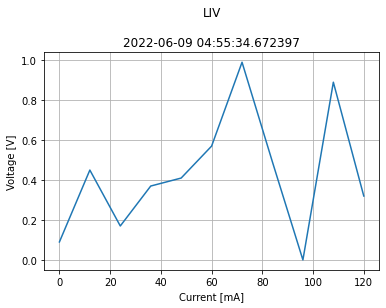

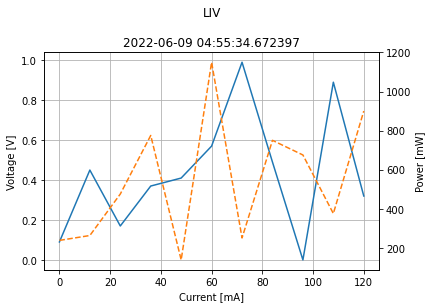

In [24]:
single_voltage.plot()

liv.plot((single_voltage, single_power))